<a href="https://colab.research.google.com/github/slyardley/SaoPaulo_tutorial/blob/main/SO_PSP_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Solar Orbiter and Parker Solar Probe data analysis**

In this notebook we will go through an introduction of how we can use sunpy and other packages to perform data analysis on Solar Orbiter and Parker Solar Probe data


**Some useful links:**

SunPy: https://sunpy.org/

Solar Orbiter Archive: https://soar.esac.esa.int/soar/

Summary of Solar Orbiter Observing Plans (SOOPs): https://www.cosmos.esa.int/web/solar-orbiter/soops-summary

Inventory plots of data on SOAR: https://www.cosmos.esa.int/web/soar/inventory-plots

Solar Orbiter tutorials: https://github.com/SolarOrbiterWorkshop/solo8_tutorials/

Magnetic Connectivity Tool: http://connect-tool.irap.omp.eu/

We will focus on:
1. Downloading remote-sensing data

In [5]:
%pip install -r https://raw.githubusercontent.com/slyardley/SaoPaulo_tutorial/refs/heads/main/requirements.txt

Import the packages that we will use in this notebook

In [104]:
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
import pandas as pd
from sunpy.net import Fido, attrs as a
from sunpy.coordinates import frames, get_horizons_coord
from sunpy.time import parse_time
import sunpy.map
import sunpy.timeseries
import sunpy_soar
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
%matplotlib widget

# **How to access and download data using Fido**

Lets look for some SDO/AIA and Solar Orbiter EUI/FSI data from the Fast Wind SOOP from October 2023

We can do this by using Fido. For more information on Fido: https://docs.sunpy.org/en/stable/tutorial/acquiring_data/index.html

You can use specific attributes to search for the data e.g. Product, SOOP name etc



In [136]:
tstart = parse_time("2023-10-24 11:40")
tend = parse_time("2023-10-26 22:47")


# **Constructing a query**

In [137]:
eui_query = Fido.search(a.Time(tstart, tend),
                        a.soar.Product("eui-fsi174-image"),
                        a.Level(2), a.soar.SOOP("L_SMALL_HRES_HCAD_Fast-Wind"))

In [138]:
eui_query

Instrument,Data product,Level,Start time,End time,Data item ID,Filename,Filesize,SOOP Name
,,,,,,,Mbyte,
str3,str16,str2,str23,str23,str43,str52,float64,str27
EUI,eui-fsi174-image,L2,2023-10-24 11:40:55.204,2023-10-24 11:41:05.204,solo_L2_eui-fsi174-image_20231024T114055204,solo_L2_eui-fsi174-image_20231024T114055204_V01.fits,4.732,L_SMALL_HRES_HCAD_Fast-Wind
EUI,eui-fsi174-image,L2,2023-10-24 11:50:55.206,2023-10-24 11:51:05.206,solo_L2_eui-fsi174-image_20231024T115055206,solo_L2_eui-fsi174-image_20231024T115055206_V01.fits,4.628,L_SMALL_HRES_HCAD_Fast-Wind
EUI,eui-fsi174-image,L2,2023-10-24 12:00:55.207,2023-10-24 12:01:05.207,solo_L2_eui-fsi174-image_20231024T120055207,solo_L2_eui-fsi174-image_20231024T120055207_V01.fits,4.726,L_SMALL_HRES_HCAD_Fast-Wind
EUI,eui-fsi174-image,L2,2023-10-24 12:10:55.209,2023-10-24 12:11:05.209,solo_L2_eui-fsi174-image_20231024T121055209,solo_L2_eui-fsi174-image_20231024T121055209_V01.fits,4.62,L_SMALL_HRES_HCAD_Fast-Wind
EUI,eui-fsi174-image,L2,2023-10-24 12:20:55.209,2023-10-24 12:21:05.209,solo_L2_eui-fsi174-image_20231024T122055209,solo_L2_eui-fsi174-image_20231024T122055209_V01.fits,4.625,L_SMALL_HRES_HCAD_Fast-Wind
EUI,eui-fsi174-image,L2,2023-10-24 12:30:55.210,2023-10-24 12:31:05.210,solo_L2_eui-fsi174-image_20231024T123055210,solo_L2_eui-fsi174-image_20231024T123055210_V01.fits,4.622,L_SMALL_HRES_HCAD_Fast-Wind
EUI,eui-fsi174-image,L2,2023-10-24 12:40:55.211,2023-10-24 12:41:05.211,solo_L2_eui-fsi174-image_20231024T124055211,solo_L2_eui-fsi174-image_20231024T124055211_V01.fits,4.614,L_SMALL_HRES_HCAD_Fast-Wind
EUI,eui-fsi174-image,L2,2023-10-24 12:50:55.212,2023-10-24 12:51:05.212,solo_L2_eui-fsi174-image_20231024T125055212,solo_L2_eui-fsi174-image_20231024T125055212_V01.fits,4.614,L_SMALL_HRES_HCAD_Fast-Wind


Now download the first EUI file in the list



In [116]:
eui_query[0][0]

Instrument,Data product,Level,Start time,End time,Data item ID,Filename,Filesize,SOOP Name
,,,,,,,Mbyte,
str3,str16,str2,str23,str23,str43,str52,float64,str27
EUI,eui-fsi174-image,L2,2023-10-24 11:50:55.206,2023-10-24 11:51:05.206,solo_L2_eui-fsi174-image_20231024T115055206,solo_L2_eui-fsi174-image_20231024T115055206_V01.fits,4.628,L_SMALL_HRES_HCAD_Fast-Wind


In [139]:
eui_file = Fido.fetch(eui_query[0][0], path="./{instrument}/{file}")

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_eui-fsi174-image_20231024T114055204_V01.fits:   0%|          | 0.00/4.73M [00:00<?, ?B/s]

In [140]:
eui_file

['EUI/solo_L2_eui-fsi174-image_20231024T114055204_V01.fits']

In [141]:
euifsi = sunpy.map.Map(eui_file)

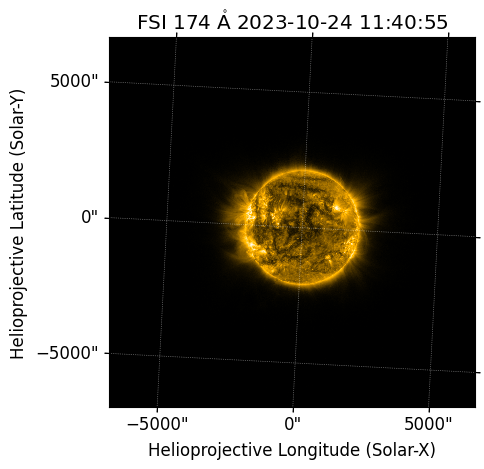

In [142]:
euifsi.plot()

In [143]:
x = [-2500,2500]
y = [-2500,2500]

bottom_left = SkyCoord(x[0]*u.arcsec,y[0]*u.arcsec, frame=euifsi.coordinate_frame, unit=u.arcsec)
top_right = SkyCoord(x[1]*u.arcsec,y[1]*u.arcsec, frame=euifsi.coordinate_frame, unit=u.arcsec)
euifsi_smap = euifsi.submap(bottom_left, top_right=top_right)

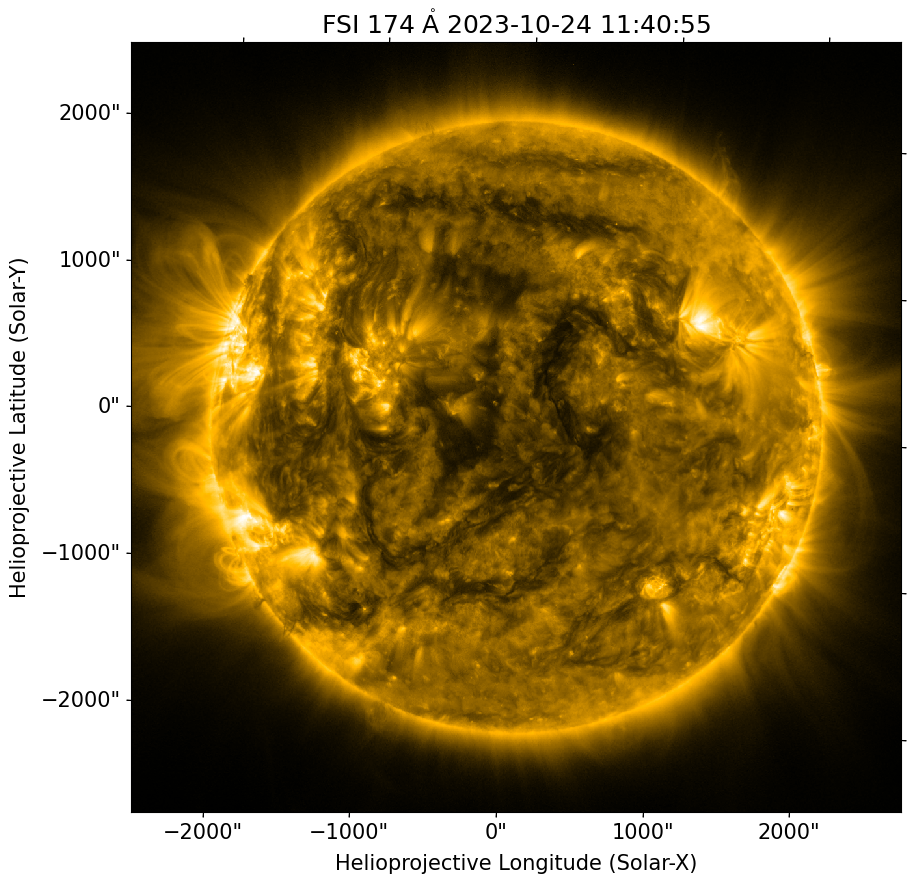

In [144]:
plt.rc("font", size=15)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=euifsi_smap)
euifsi_smap.plot()
ax.grid(False)

# **Download the equivalent SDO/AIA image**

Solar Orbiter has an unique elliptical orbit and so the distance to the Sun will change over time.

Also, because Solar Orbiter is closer to the Sun then we need to remember to take into account light travel time if comparing with data from Earth-based satellites (i.e. SDO, Hinode, IRIS etc)

In [145]:
euifsi.meta['DATE_EAR']

'2023-10-24T11:45:25.573'

In [148]:
aia_result = Fido.search(a.Time("2023-10-24 11:45", "2023-10-24 11:46"),
                     a.Instrument("AIA"),
                     a.Wavelength(193*u.angstrom))

In [149]:
aia_result[0][2]

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,fileid
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64,str24
2023-10-24 11:45:28.000,2023-10-24 11:45:29.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,aia__lev1:193:1477223167


In [150]:
aia_file = Fido.fetch(aia_result[0][2], path="./{instrument}/{file}")

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.193A_2023_10_24T11_45_28.84Z.image_lev1.fits:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

In [151]:
aia_193 = sunpy.map.Map(aia_file)

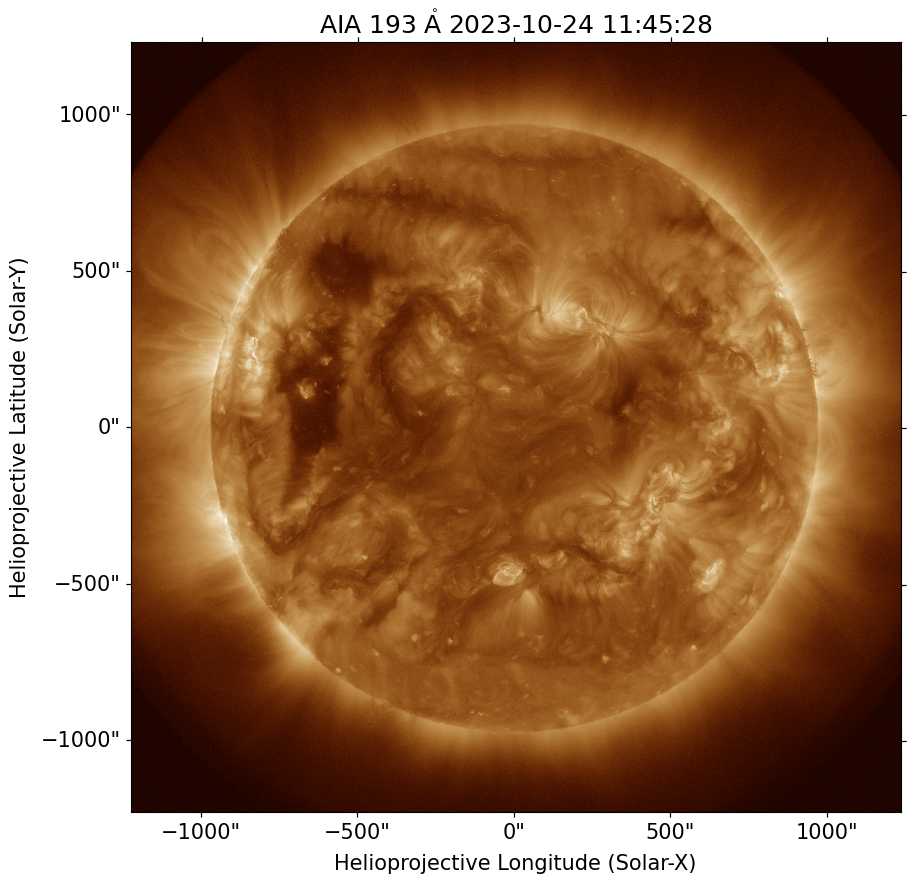

In [152]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=aia_193)
aia_193.plot()
ax.grid(False)

**Lets compare the positions of the different spacecraft i.e. Solar Orbiter, Parker Solar Probe and SDO**

First we get the positions of each of the different spacecraft

In [153]:
solo_coord = get_horizons_coord("solo", tstart)
psp_coord =  get_horizons_coord("psp", tstart)
earth_coord =  get_horizons_coord("399", tstart)

INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144)


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]


INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]


INFO:sunpy:Obtained JPL HORIZONS location for Earth (399)                    


INFO: Obtained JPL HORIZONS location for Earth (399)                     [sunpy.coordinates.ephemeris]


INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]


INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144)


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]


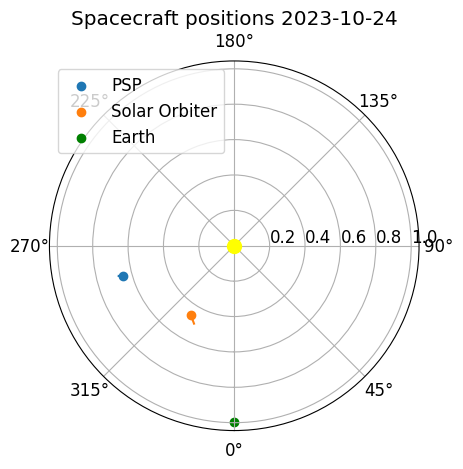

In [154]:
plt.rc("font", size=12)
fig = plt.figure()
ax = fig.add_subplot(projection="polar")

ax.scatter(psp_coord.lon.to('rad'), psp_coord.radius.to(u.AU),
           label='PSP', lw=1)
ax.scatter(solo_coord.lon.to('rad'), solo_coord.radius.to(u.AU),
           label='Solar Orbiter', lw=1)
ax.scatter(earth_coord.lon.to('rad'), earth_coord.radius.to(u.AU),
           label='Earth', color='g')
ax.plot(0, 0, marker='o', ms=10, color='yellow')

psp_seq = get_horizons_coord("psp", tstart+np.arange(0, 2.5, 0.1)*u.day)
solo_seq = get_horizons_coord("solo", tstart + np.arange(0, 2.5, 0.1)*u.day)
for coord in [psp_seq, solo_seq]:
    ax.plot(coord.lon.to('rad'), coord.radius.to(u.AU))

ax.set_theta_zero_location("S")
ax.set_rlabel_position(90)
ax.set_title("Spacecraft positions {:s}".format(tstart.strftime("%Y-%m-%d")))
ax.legend(loc="upper left")

You can see from the plot that Solar Orbiter and Parker Solar Probe are approximately 0.4 and 0.6 AU from the Sun (SDO is at ~1AU).

**Lets see what the Sun looks like from Parker Solar Probe**

We can reproject the images from one spacecraft viewpoint to another using the coordinate frame work. Check the SunPy example gallery for more details.


In [155]:
#Create a reference coordinate for EUI
ref_coord_eui = SkyCoord(0*u.arcsec, 0*u.arcsec,
                     frame='helioprojective',
                     obstime=euifsi.date,
                     observer=get_horizons_coord("psp", euifsi.date))

# Create a FITS WCS header for the reference coordinate and frame
header_eui = sunpy.map.make_fitswcs_header((3000, 3000),
                                        ref_coord_eui,
                                        scale=[16, 16]*u.arcsec/u.pix,
                                      )
# Do the same for SDO/AIA
ref_coord_aia = SkyCoord(0*u.arcsec, 0*u.arcsec,
                     frame='helioprojective',
                     obstime=aia_193.date,
                     observer=get_horizons_coord("psp", aia_193.date))


header_aia = sunpy.map.make_fitswcs_header((3000, 3000),
                                        ref_coord_aia,
                                        scale=[16, 16]*u.arcsec/u.pix,
                                      )




INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]


INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]


In [156]:
eui_psp = euifsi.reproject_to(header_eui)
aia_psp = aia_193.reproject_to(header_aia)

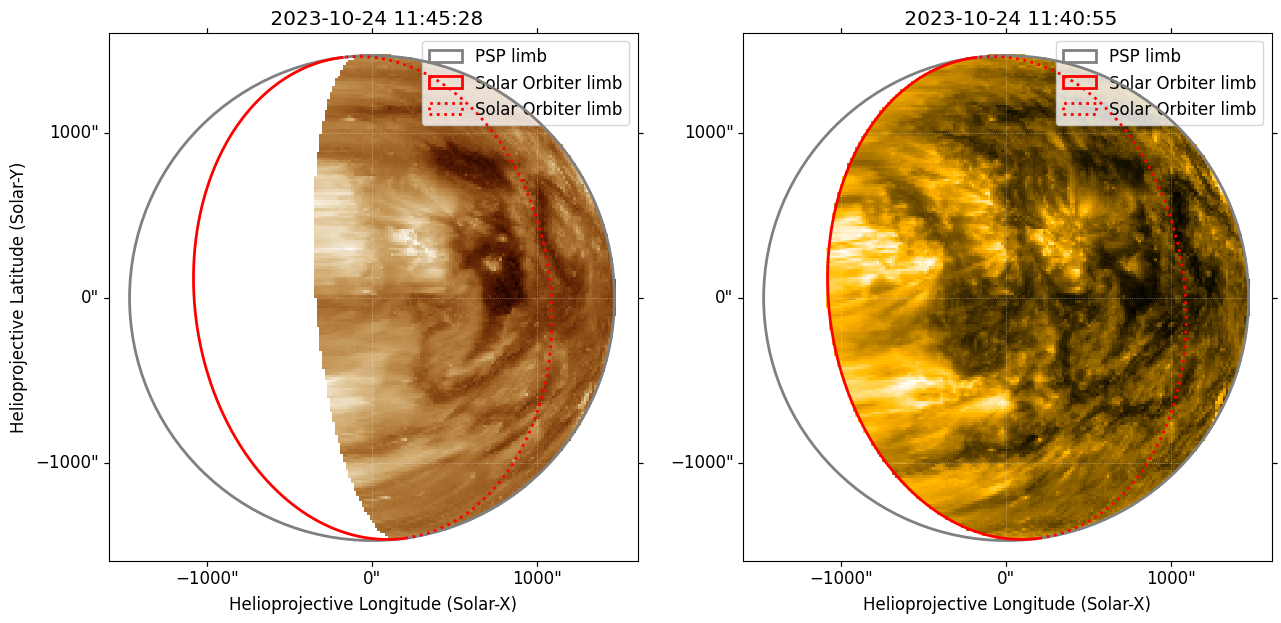

In [157]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(121, projection=aia_psp)
aia_psp.plot()
aia_psp.draw_limb(color='grey', lw=2, label="PSP limb")
euifsi.draw_limb(color='red', lw=2, label="Solar Orbiter limb")
ax1.set_xlim(1400,1600)
ax1.set_ylim(1400,1600)
ax1.legend(loc="upper right")

ax2 = fig.add_subplot(122, projection=eui_psp)
eui_psp.plot()
eui_psp.draw_limb(color='grey', lw=2, label="PSP limb")
euifsi.draw_limb(color='red', lw=2, label="Solar Orbiter limb")

ax2.set_xlim(1400,1600)
ax2.set_ylim(1400,1600)
ax2.set_ylabel(' ')
ax2.legend(loc="upper right")


# **Ok, now lets download some more data**

Lets start with Solar Orbiter EUI/HRI, PHI/HRT and SPICE



In [164]:
phi_query = Fido.search(a.Time(tstart, tend),
                        a.Instrument.phi, a.soar.Product('phi-hrt-blos'),
                        a.Level(2))
eui_hri_query = Fido.search(a.Time(tstart, tend),
                        a.Instrument.eui, a.soar.Product('eui-hrieuv174-image'),
                        a.Level(2))

In [167]:
phi_blos = Fido.fetch(phi_query[0][0], path="./{instrument}/{file}")
eui_hri = Fido.fetch(eui_hri_query[0][0], path="./{instrument}/{file}")

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_phi-hrt-blos_20231024T114503_V01.fits:   0%|          | 0.00/17.0M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_eui-hrieuv174-image_20231024T114500205_V01.fits:   0%|          | 0.00/5.23M [00:00<?, ?B/s]

In [171]:
eui_hri_map = sunpy.map.Map(eui_hri)
phi_blos_map = sunpy.map.Map(phi_blos)

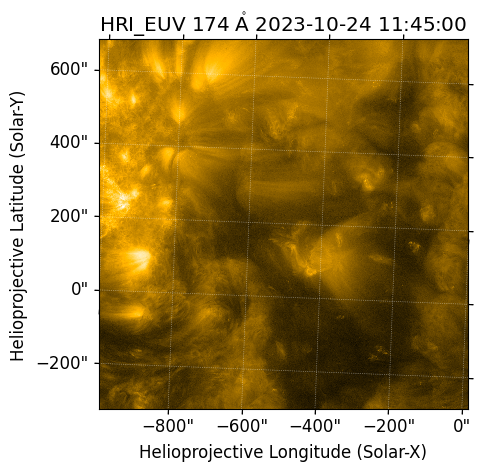

In [172]:
eui_hri_map.plot()

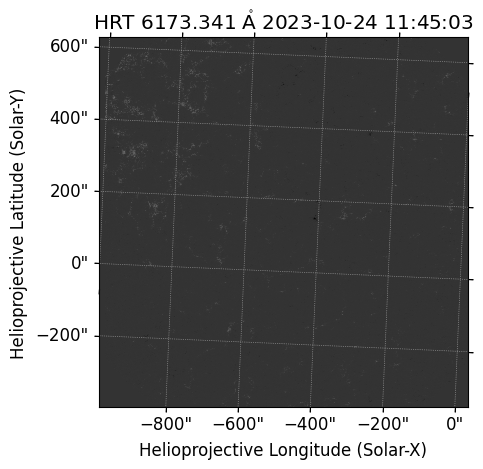

In [173]:
phi_blos_map.plot()